# Spam email detection // classification using python

---

- Author: Masud Rahman (https://masud90.github.io/)
- Dataset: Spambase from UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/dataset/94/spambase)

## Initialize setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, roc_curve, auc, precision_recall_curve
import xgboost as xgb

## Load and inspect dataset

In [5]:
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 

In [6]:
# variable information 
spambase.variables

,name,role,type,demographic,description,units,missing_values
0,word_freq_make,Feature,Continuous,None,None,None,no
1,word_freq_address,Feature,Continuous,None,None,None,no
2,word_freq_all,Feature,Continuous,None,None,None,no
3,word_freq_3d,Feature,Continuous,None,None,None,no
4,word_freq_our,Feature,Continuous,None,None,None,no
5,word_freq_over,Feature,Continuous,None,None,None,no
6,word_freq_remove,Feature,Continuous,None,None,None,no
7,word_freq_internet,Feature,Continuous,None,None,None,no
8,word_freq_order,Feature,Continuous,None,None,None,no
9,word_freq_mail,Feature,Continuous,None,None,None,no


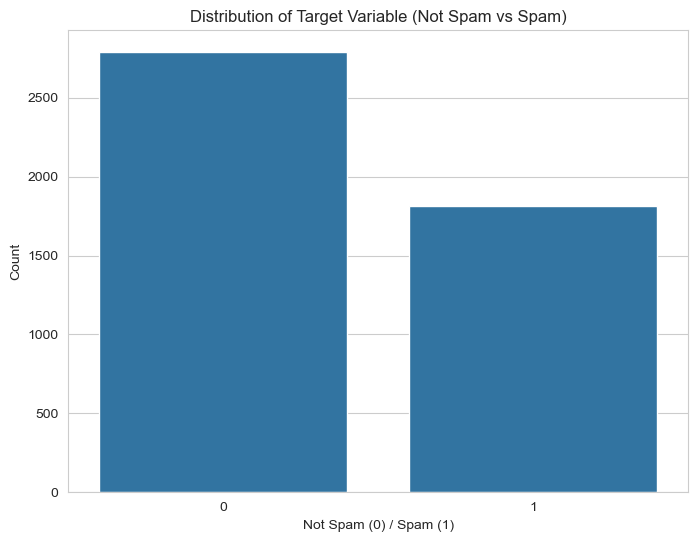

In [7]:
# Ensure y is a 1-dimensional array for seaborn compatibility
y = y.squeeze()  # Converts y from (4601, 1) to (4601,)

# Step 4: EDA for target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Target Variable (Not Spam vs Spam)')
plt.xlabel('Not Spam (0) / Spam (1)')
plt.ylabel('Count')
plt.show()

<Figure size 2000x2000 with 0 Axes>

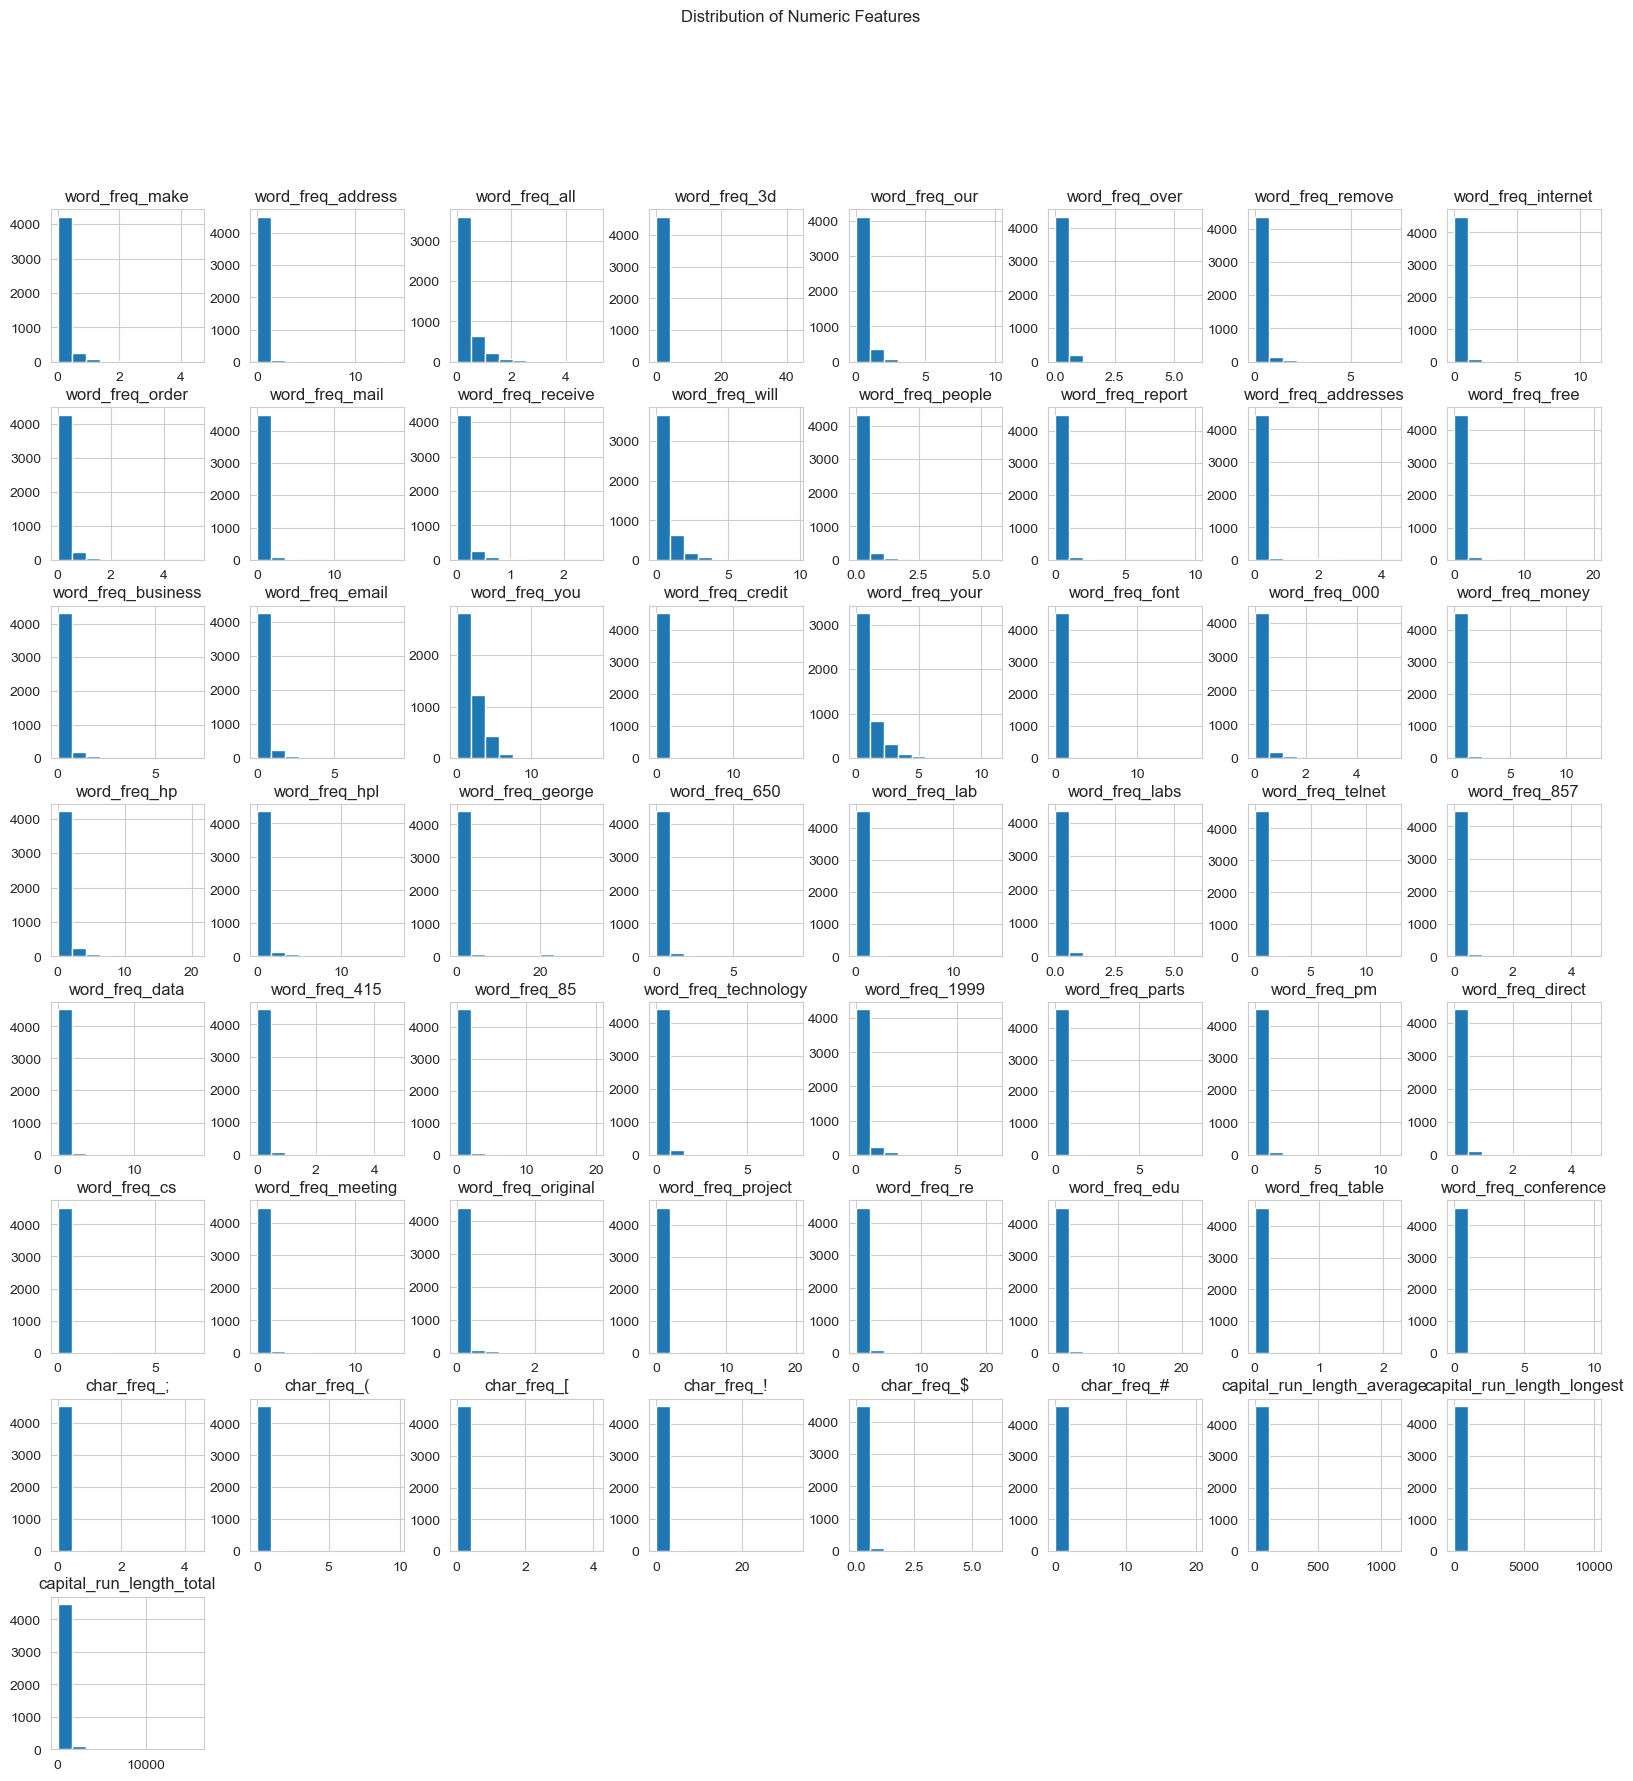

In [8]:
# EDA for numeric variables
plt.figure(figsize=(20, 20))
X.hist(bins=10, figsize=(20, 20))
plt.suptitle('Distribution of Numeric Features')
plt.show()

## Build model

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Create and train the XGBoost model
model = xgb.XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## Make predictions and evaluate the model

In [14]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9536567704561911
Precision: 0.9316546762589928
Confusion Matrix:
[[799  38]
 [ 26 518]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       837
           1       0.93      0.95      0.94       544

    accuracy                           0.95      1381
   macro avg       0.95      0.95      0.95      1381
weighted avg       0.95      0.95      0.95      1381



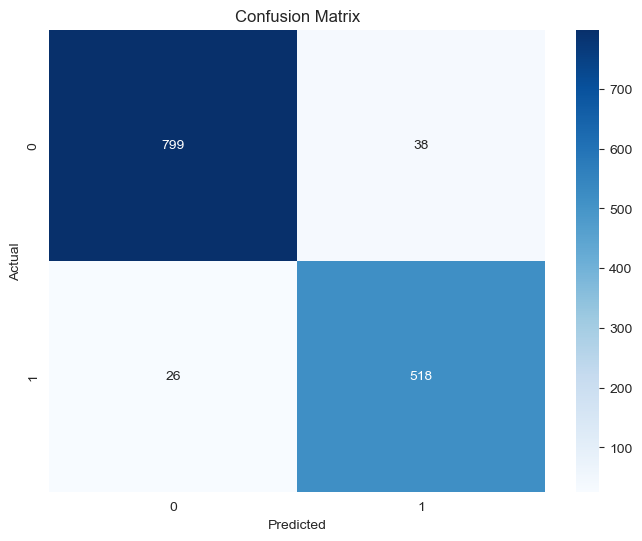

In [16]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

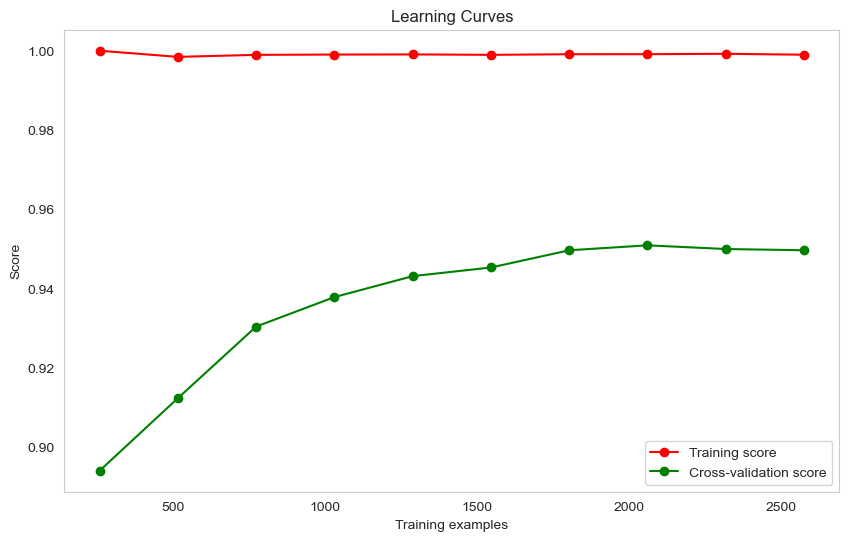

In [17]:
# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

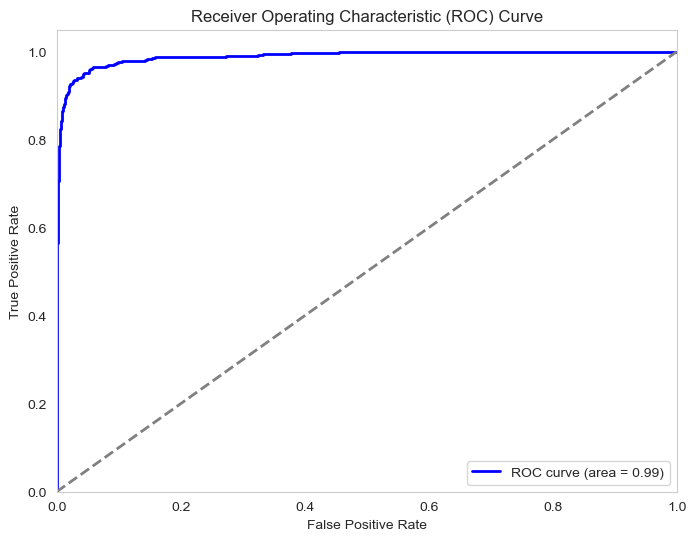

In [18]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

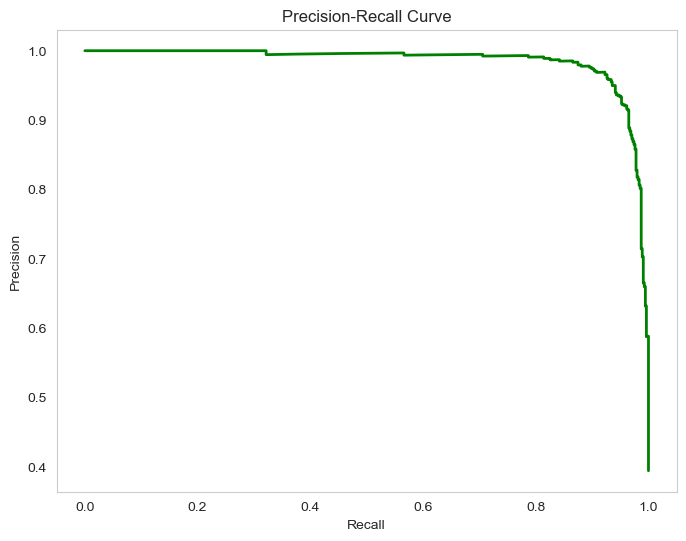

In [19]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()